In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [8]:
from datasets.carla import *
from datasets.nuscenes import *

from models.baseline import *
from tools.utils import *

from time import time
from tqdm import tqdm

%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
model = Baseline([7], backbone="lss")

Loaded pretrained weights for efficientnet-b0


In [44]:
carla_data = CarlaDataset("../../data/carla/train", False)

In [28]:
nusc, dataroot = get_nusc("mini", "../../data/nuscenes")
nusc_data = NuScenesDataset(nusc, False)

In [48]:
images, intrinsics, extrinsics, labels = carla_data[64]
# images, intrinsics, extrinsics, labels = nusc_data[0]

In [49]:
i = intrinsics[None].to(7)
e = extrinsics[None].to(7)

In [50]:
pts = model.backbone.module.get_geometry(i, e).cpu().numpy()

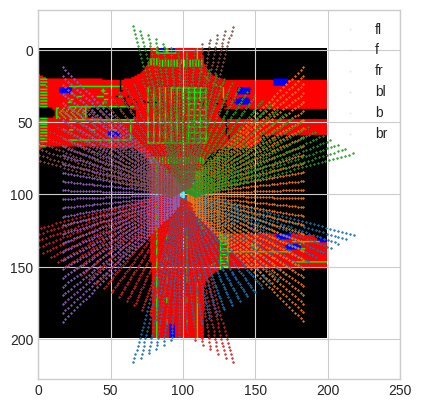

In [51]:
plt.imshow(map_rgb(labels, ego=True) / 255)

cam = ['fl', 'f', 'fr', 'bl', 'b', 'br']

for i in range(6):
    plt.scatter(pts[:, i, :, :, :, 0].reshape(-1) * 2 + 100, pts[:, i, :, :, :, 1].reshape(-1) * 2+ 100, s=.15, label=cam[i], alpha=.2, edgecolors='face')

plt.xlim(0, 250)
# plt.ylim(0, 200)
plt.legend(loc='upper right')

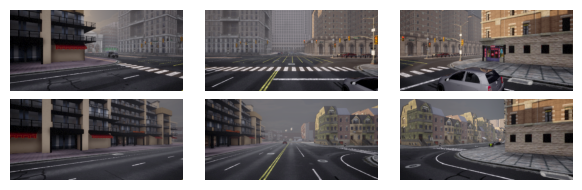

In [39]:
fig, axes = plt.subplots(2, 3, figsize=(6, 2))

for i, ax in enumerate(axes.flatten()):
    ax.axis('off')
    image = images[i].permute(1, 2, 0).numpy()
    if i > 2:
        image = np.fliplr(image)
    ax.imshow(image)

plt.tight_layout()